# 1) Introduction


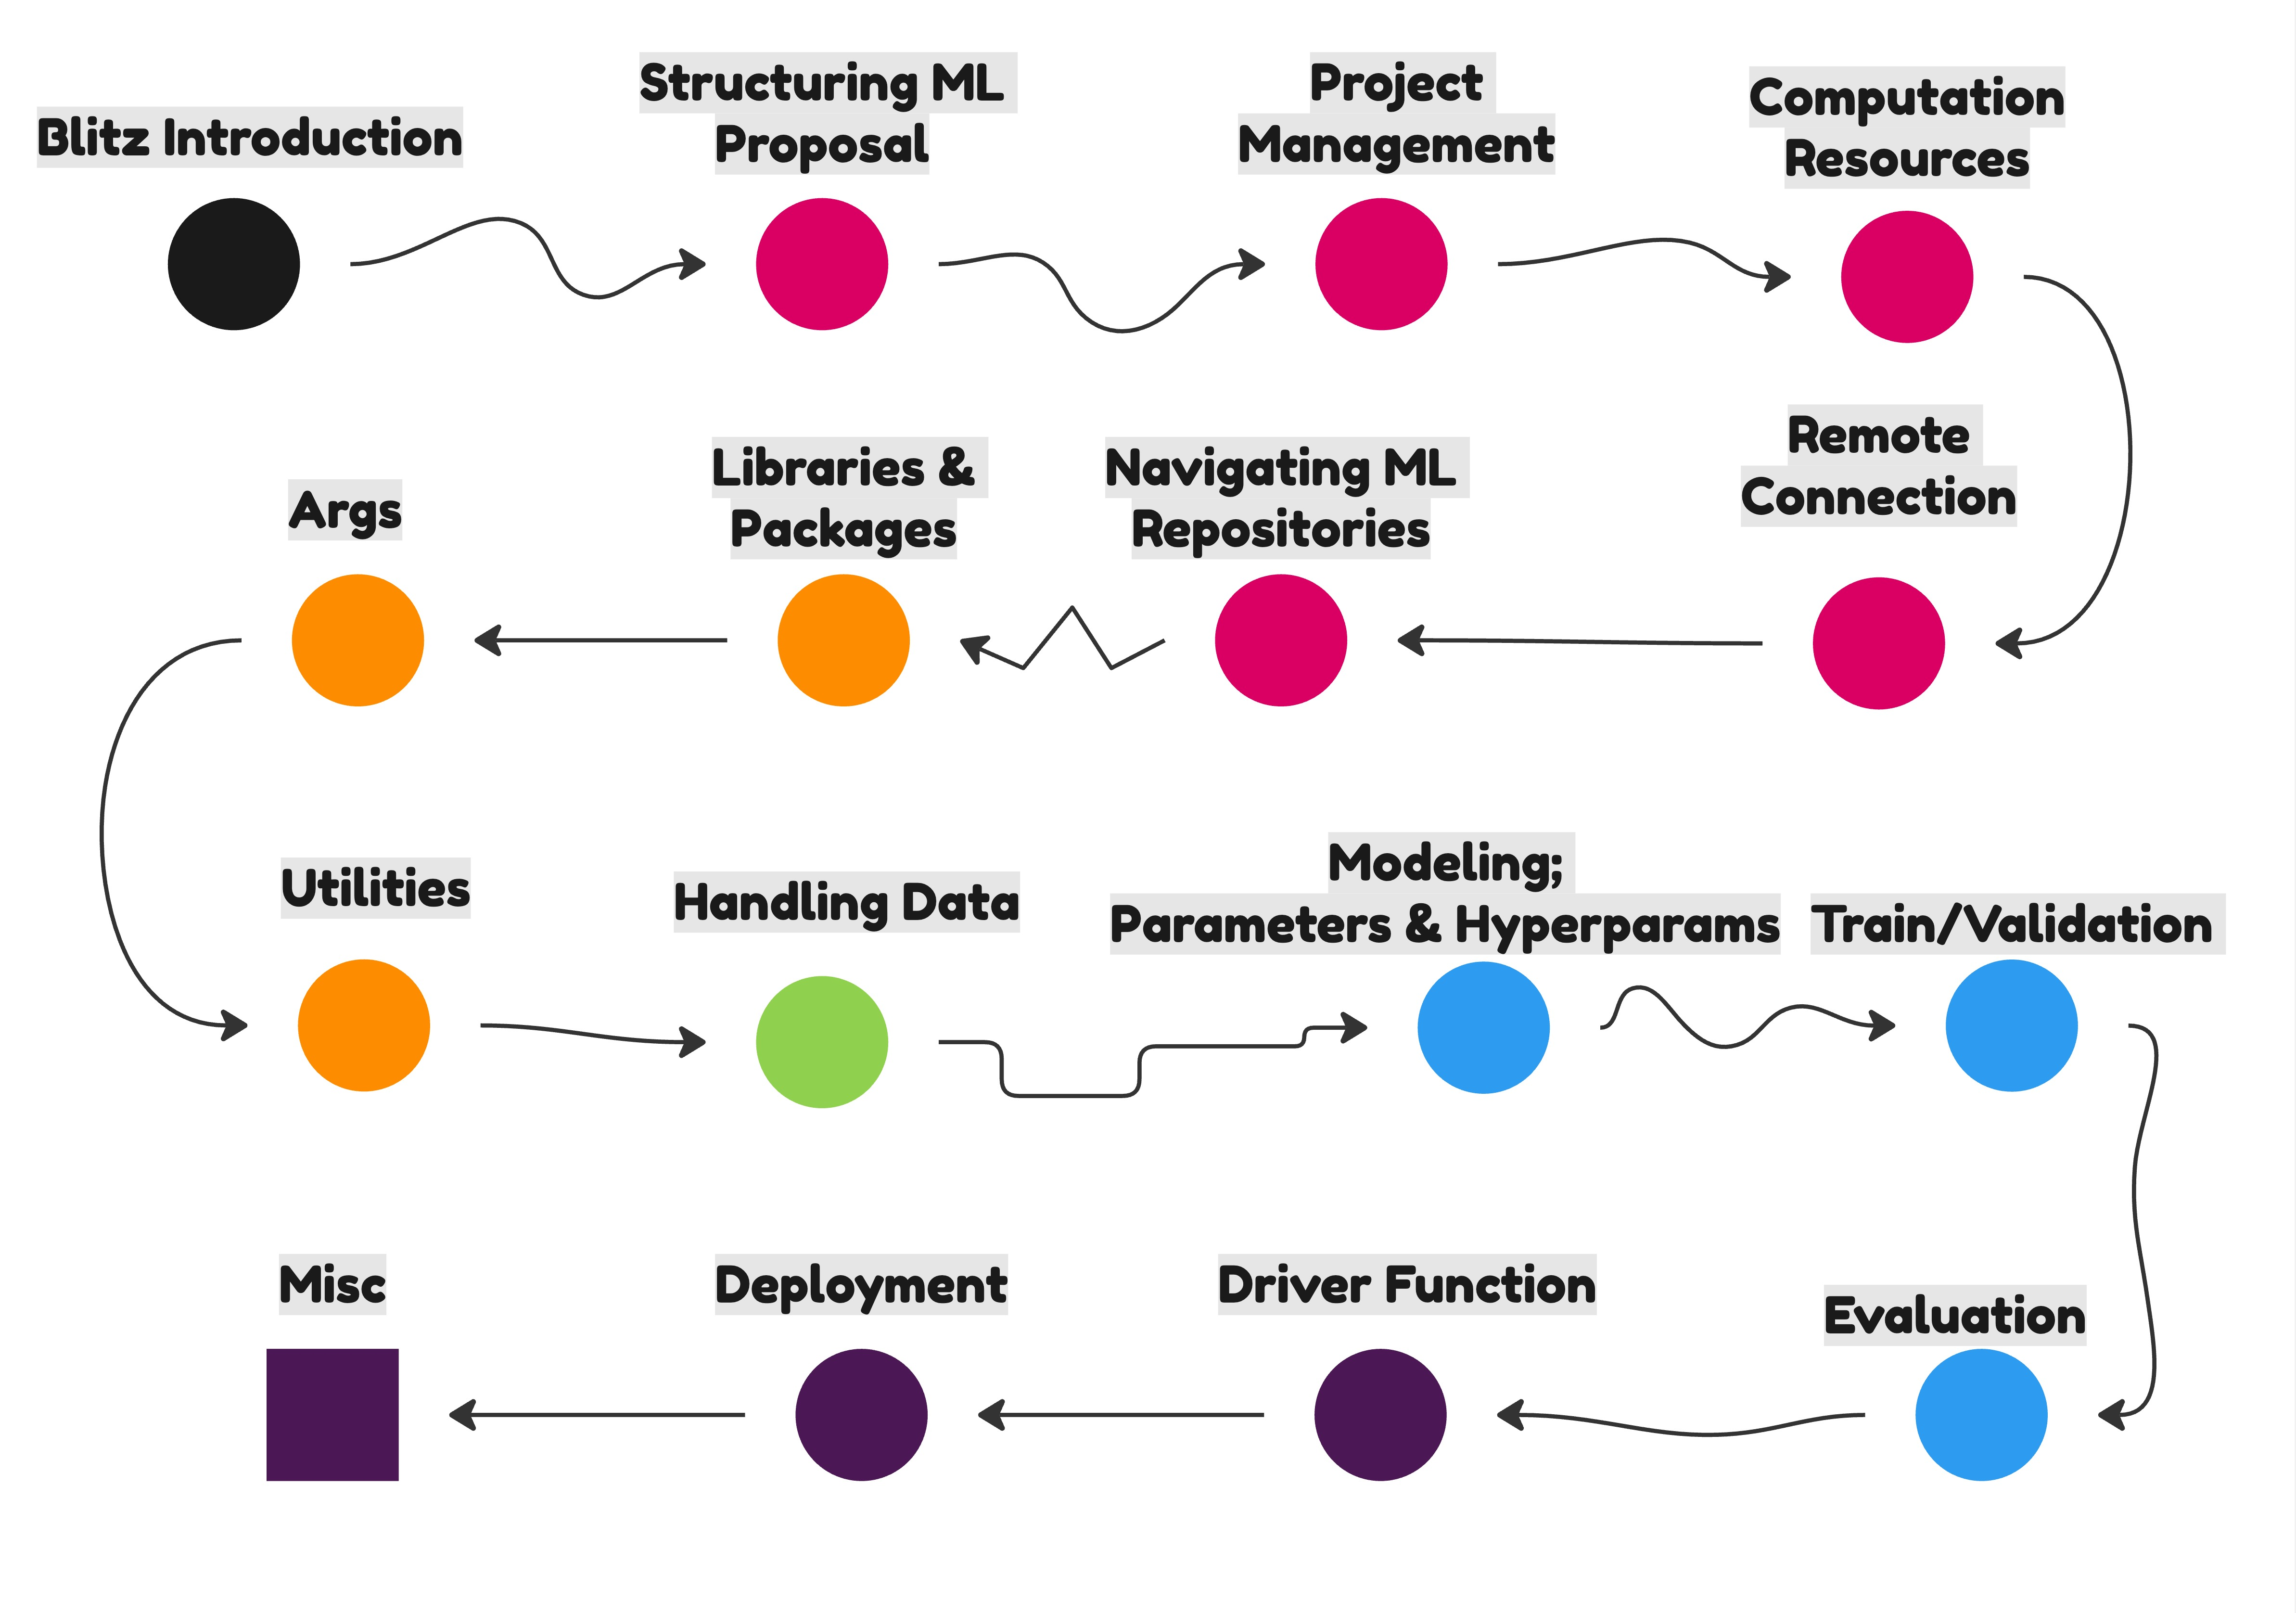

In [2]:
from IPython.display import Image, display
display(Image(filename='ML_Patterns_Principles_big_pic.jpg'))

<br>
<br>
<br>
<figure>
<center>
<!-- <img src='https://drive.google.com/uc?id=1DqRpWZB2bUR35QyF04zVIV7smRbfNm5Y' /> -->
<figcaption>Machine Learning Projects Pipeline. Read more at https://www.rezaadventures.com/ml</figcaption></center>
</figure>


<br>
<br>
<br>
<br>

# 2) Project Management

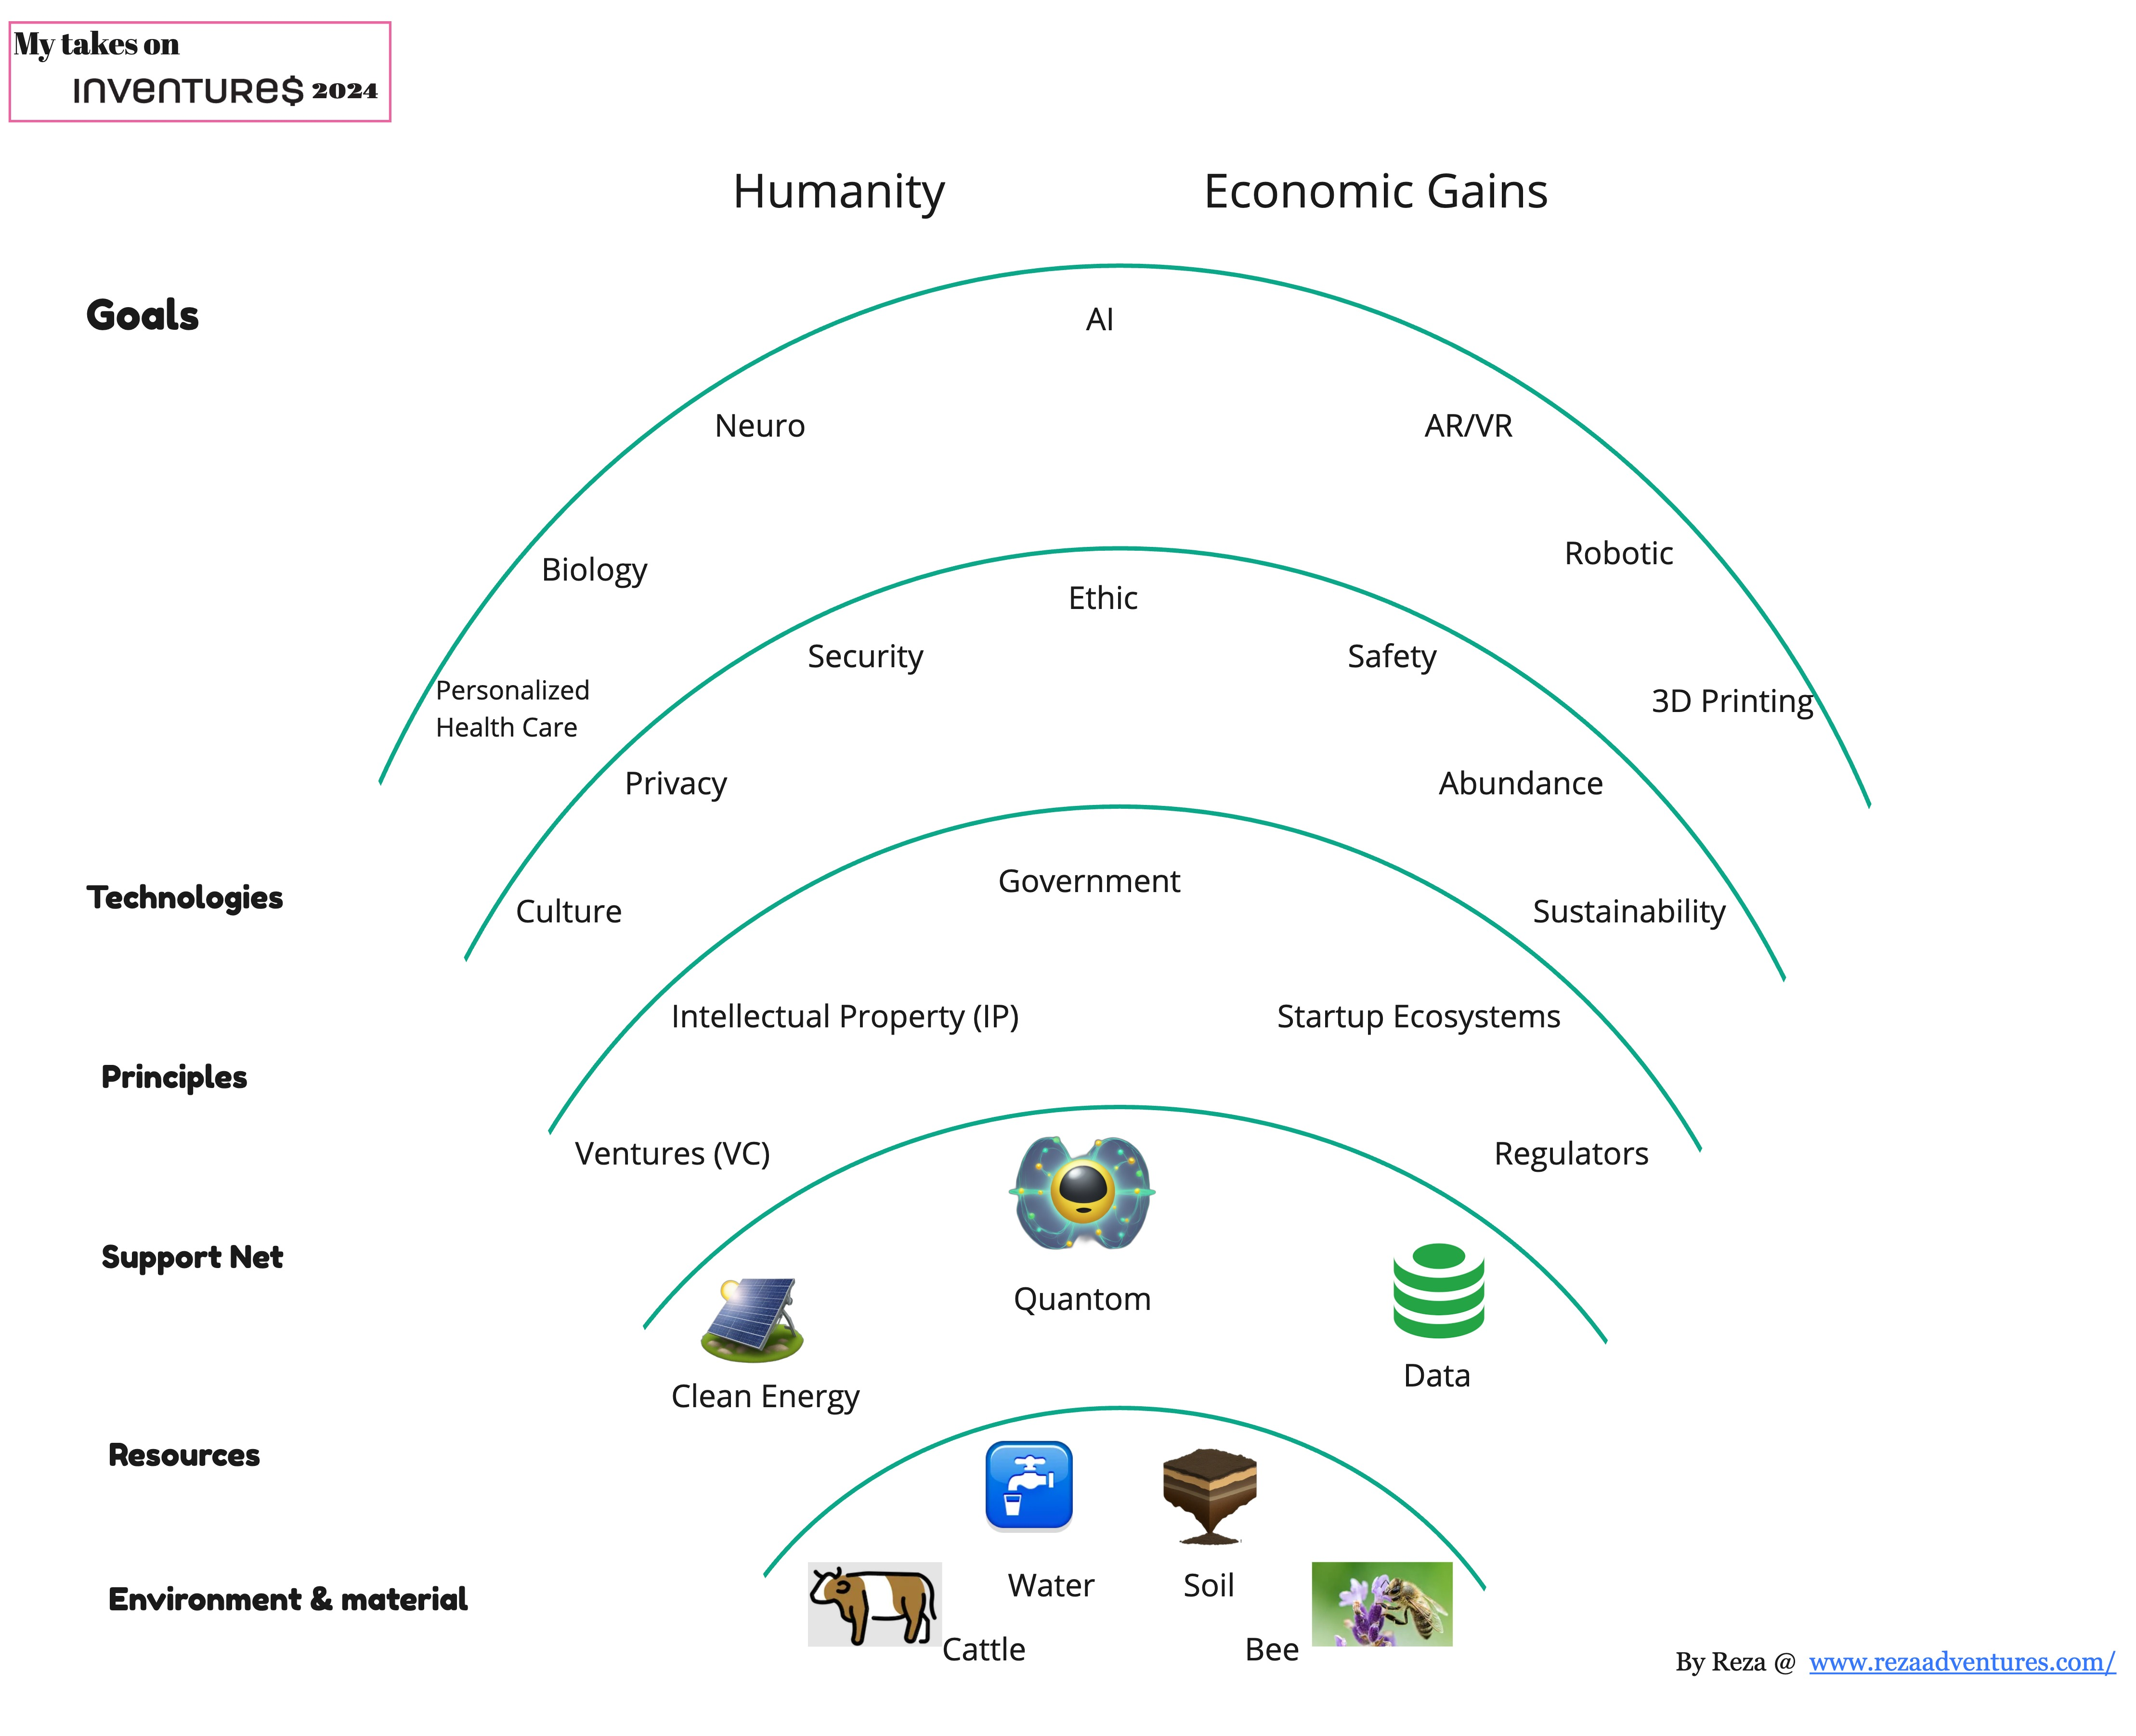

In [3]:
display(Image(filename='Inventures_Manual_Summary.jpeg'))

<figure>
<center>
<!-- <img src='https://drive.google.com/uc?id=186agXcnMPacUfIUL7J-IBtsn_s7DVsbU' /> -->
<figcaption>My summary of Inventures. Used for personal alignment and fiquring out the implicaiton and application of various trending topics in my field.</figcaption></center>
</figure>
<br>
<br>

<!-- This is an example of an HTML disclaimer for an email message -->
<tr>
  <p style="font-size: 36px;"><strong>⚠️ </strong>Disclaimers:</p>
  <li>
  This is an educational purpose porjece, in-line with Alberta Innovates privacy policies. Any further use of the sessions data should be checked with their latest privacy policy.
  </li>
  <li>
  The privacy policy page is currently accesable at
  https://inventurescanada.com/privacy-policy/
  </li>
  <li>
  Language models may modify the text during summarization process. The only source of data is their webpage at https://inventurescanada.com/sessions/
  </li>
</tr>
<br>
<br>
<br>

# 3) Env Setup

In [ ]:
!pip install langchain==0.2.3 langchain_experimental umap-learn scikit-learn langchain_community tiktoken langchain-openai langchainhub chromadb langchain-anthropic wikipedia
!pip install beautifulsoup4 lxml # for scraping and parsing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.0/974.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.8/526.8 kB 31.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.3

In [ ]:
%%writefile requirements_Inventures_RAG.txt
# pip freeze on Google Colab

Writing requirements_Inventures_RAG.txt


In [ ]:
!pip freeze >> requirements_Inventures_RAG.txt

In [ ]:
# Importing libraries
import os
import pickle
import json # saving sessions data in a json file
from google.colab import userdata # for importing env variable on Colab
import matplotlib.pyplot as plt
import tiktoken # for counting the # of tokens in each document
import numpy as np
import pandas as pd
import umap # for dimensionality reduction
from sklearn.mixture import GaussianMixture # for clustering
from typing import Dict, List, Optional, Tuple # for type hinting

from bs4 import BeautifulSoup # for scraping and parsing

# Wikiloader in case we want to retrieve data from Wikipedia as a trainset
from langchain_community.document_loaders import WikipediaLoader
# converting doc_text files into langchain document objects
from langchain.docstore.document import Document

from langchain_openai import OpenAIEmbeddings # For text-to-vector
from langchain_openai import ChatOpenAI # For API call to LLM
from langchain_anthropic import ChatAnthropic # Alternative to OpenAI LLM

from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

RANDOM_SEED = 307  # Fixed seed for reproducibility of clustering

from langchain_community.vectorstores import Chroma #In-memory VectorDB

from langchain import hub # Langchain Hub for RAG prompt templates
# placeholder used in chain
from langchain_core.runnables import RunnablePassthrough



In [ ]:
# Args and global variables
os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")
os.environ["ANTHROPIC_API_KEY"] = 'anthropic-api-key'

# 4) Data Handeling


<!-- This is an example of an HTML disclaimer for an email message -->
<tr>
  <p style="font-size: 36px;"><strong>Different approached I tried for scraping the data:</strong></p>
  <li>
  Online tools
  </li>
  <li>
  Diffbot API
  </li>
  <li>
  Thinking out of the box :) I downaloded the source code, fortunately it had all the data rendered already, and then I sraped it using BeautifulSoup library.
  </li>
</tr>
<br>
<br>
<br>

## 4.1 Scraping and parsing the data

In [ ]:
def parse_sessions_html(html_file_add):
  # Read the HTML file
  with open(html_file_add, 'r', encoding='utf-8') as file:
    html_content = file.read()

  # Parse the HTML content using BeautifulSoup
  soup = BeautifulSoup(html_content, 'lxml')

  # Extract session details
  sessions = []
  session_divs = soup.find_all('div', attrs={"x-html": "session.card_template"})

  for session_div in session_divs:
    session = {}

    # Extract session category
    category_tag = session_div.find('span', class_="block w-fit bg-green py-2 -mt-1 md:ml-0 px-6 lg:pr-8 text-xs font-moderna rounded-br-full")
    session['category'] = category_tag.text.strip() if category_tag else None

    # Extract session title
    title_tag = session_div.find('h2', class_="font-moderna uppercase text-base xl:text-lg text-purple")
    session['title'] = title_tag.text.strip() if title_tag else None

    # Extract session description
    description_tag = session_div.find('div', class_="cursor-pointer text-base line-clamp-2")
    session['description'] = description_tag.text.strip() if description_tag else None

    # Extract speakers
    speakers = []
    speaker_section = session_div.find('div', class_="md:border-t border-slate-200 md:pt-4")
    if speaker_section:
      speaker_buttons = speaker_section.find_all('button', class_="group relative flex gap-4 justify-start items-center !no-underline")
      for speaker_button in speaker_buttons:
        speaker = {}

        # Extract speaker name
        name_tag = speaker_button.find('h4', class_="text-sm font-moderna")
        speaker['name'] = name_tag.text.strip() if name_tag else None

        # Extract speaker position
        position_tag = speaker_button.find('p', class_="override text-sm leading-tight text-slate-500")
        speaker['position'] = position_tag.text.strip() if position_tag else None

        speakers.append(speaker)

    session['speakers'] = speakers
    sessions.append(session)

  sessions.pop(0) # The first session is empty
  # Convert the sessions list to a JSON string
  json_string = json.dumps(sessions)
  # Write the JSON string to a file
  with open('sessions.json', 'w') as f:
    f.write(json_string)

  return sessions


<br>
<br>

## 4.2) Processing data

In [ ]:
def save_sessions_to_text_files(sessions):
    """Save sessions to a separate text files."""
    for i, session in enumerate(sessions, start=1):
      category = session['category']
      title = session['title']
      description = session['description']
      speakers = session['speakers']
      content = f"A session under the category of : {category} which is titled as: {title} is held at Inventures. The description of this session is: {description}. \n "

      if speakers:
        content += "The speakers of this session are: \n"
      for speaker in speakers:
        name = speaker['name']
        position = speaker['position']
        content += f"  - Name: {name} who has a position: {position}\n"

      content += "\n"

      with open(f"./sessions_txt/{i}.txt", "a", encoding='utf-8') as file:
        file.write(content)
        file.close()

# 5) Modeling

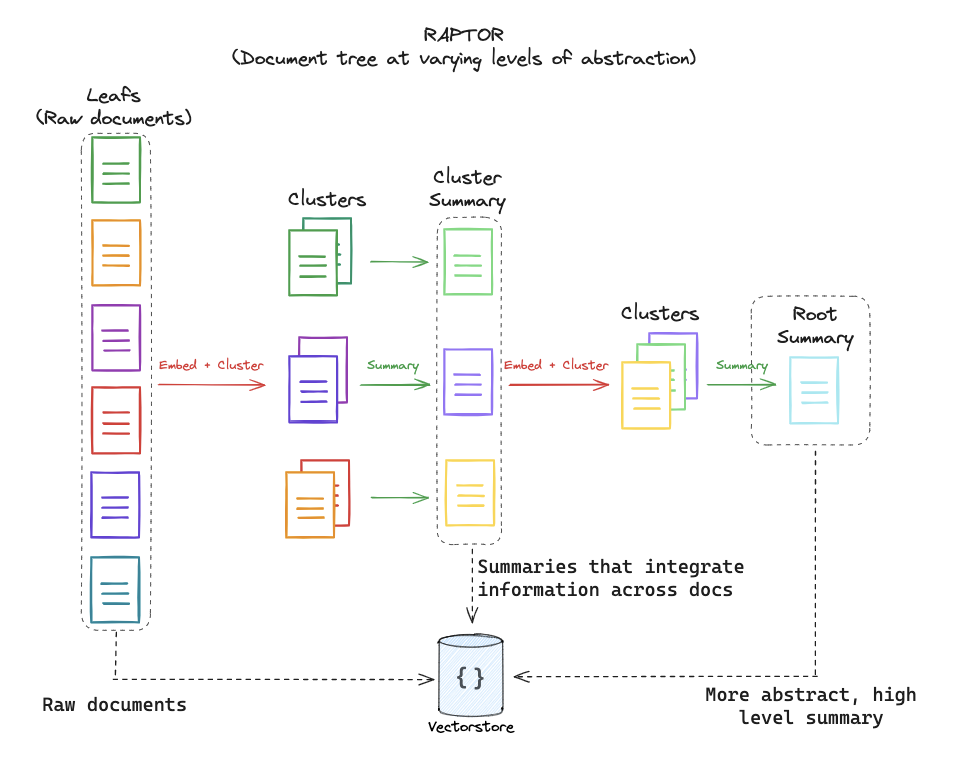

In [3]:
display(Image(filename='RAPTOR_RAG.png'))


<figure>
<center>
<!-- <img src='https://drive.google.com/uc?id=1hwU-8V29YDzE7E7ZXhizbpksCO0o640A' /> -->
<figcaption>RAPTOR model overview, from https://github.com/langchain-ai/langchain/blob/master/cookbook/RAPTOR.ipynb</figcaption></center>
</figure>



In [ ]:
# Reference for this cell:
# https://github.com/langchain-ai/langchain/blob/master/cookbook/RAPTOR.ipynb

### --- Code from citations referenced above (added comments and docstrings) --- ###


def global_cluster_embeddings(
    embeddings: np.ndarray,
    dim: int,
    n_neighbors: Optional[int] = None,
    metric: str = "cosine",
) -> np.ndarray:
    """
    Perform global dimensionality reduction on the embeddings using UMAP.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for the reduced space.
    - n_neighbors: Optional; the number of neighbors to consider for each point.
                   If not provided, it defaults to the square root of the number of embeddings.
    - metric: The distance metric to use for UMAP.

    Returns:
    - A numpy array of the embeddings reduced to the specified dimensionality.
    """
    if n_neighbors is None:
        n_neighbors = int((len(embeddings) - 1) ** 0.5)
    return umap.UMAP(
        n_neighbors=n_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)


def local_cluster_embeddings(
    embeddings: np.ndarray, dim: int, num_neighbors: int = 10, metric: str = "cosine"
) -> np.ndarray:
    """
    Perform local dimensionality reduction on the embeddings using UMAP, typically after global clustering.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for the reduced space.
    - num_neighbors: The number of neighbors to consider for each point.
    - metric: The distance metric to use for UMAP.

    Returns:
    - A numpy array of the embeddings reduced to the specified dimensionality.
    """
    return umap.UMAP(
        n_neighbors=num_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)


def get_optimal_clusters(
    embeddings: np.ndarray, max_clusters: int = 50, random_state: int = RANDOM_SEED
) -> int:
    """
    Determine the optimal number of clusters using the Bayesian Information Criterion (BIC) with a Gaussian Mixture Model.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - max_clusters: The maximum number of clusters to consider.
    - random_state: Seed for reproducibility.

    Returns:
    - An integer representing the optimal number of clusters found.
    """
    max_clusters = min(max_clusters, len(embeddings))
    n_clusters = np.arange(1, max_clusters)
    bics = []
    for n in n_clusters:
        gm = GaussianMixture(n_components=n, random_state=random_state)
        gm.fit(embeddings)
        bics.append(gm.bic(embeddings))
    return n_clusters[np.argmin(bics)]


def GMM_cluster(embeddings: np.ndarray, threshold: float, random_state: int = 0):
    """
    Cluster embeddings using a Gaussian Mixture Model (GMM) based on a probability threshold.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - threshold: The probability threshold for assigning an embedding to a cluster.
    - random_state: Seed for reproducibility.

    Returns:
    - A tuple containing the cluster labels and the number of clusters determined.
    """
    n_clusters = get_optimal_clusters(embeddings)
    gm = GaussianMixture(n_components=n_clusters, random_state=random_state)
    gm.fit(embeddings)
    probs = gm.predict_proba(embeddings)
    labels = [np.where(prob > threshold)[0] for prob in probs]
    return labels, n_clusters


def perform_clustering(
    embeddings: np.ndarray,
    dim: int,
    threshold: float,
) -> List[np.ndarray]:
    """
    Perform clustering on the embeddings by first reducing their dimensionality globally, then clustering
    using a Gaussian Mixture Model, and finally performing local clustering within each global cluster.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for UMAP reduction.
    - threshold: The probability threshold for assigning an embedding to a cluster in GMM.

    Returns:
    - A list of numpy arrays, where each array contains the cluster IDs for each embedding.
    """
    if len(embeddings) <= dim + 1:
        # Avoid clustering when there's insufficient data
        return [np.array([0]) for _ in range(len(embeddings))]

    # Global dimensionality reduction
    reduced_embeddings_global = global_cluster_embeddings(embeddings, dim)
    # Global clustering
    global_clusters, n_global_clusters = GMM_cluster(
        reduced_embeddings_global, threshold
    )

    all_local_clusters = [np.array([]) for _ in range(len(embeddings))]
    total_clusters = 0

    # Iterate through each global cluster to perform local clustering
    for i in range(n_global_clusters):
        # Extract embeddings belonging to the current global cluster
        global_cluster_embeddings_ = embeddings[
            np.array([i in gc for gc in global_clusters])
        ]

        if len(global_cluster_embeddings_) == 0:
            continue
        if len(global_cluster_embeddings_) <= dim + 1:
            # Handle small clusters with direct assignment
            local_clusters = [np.array([0]) for _ in global_cluster_embeddings_]
            n_local_clusters = 1
        else:
            # Local dimensionality reduction and clustering
            reduced_embeddings_local = local_cluster_embeddings(
                global_cluster_embeddings_, dim
            )
            local_clusters, n_local_clusters = GMM_cluster(
                reduced_embeddings_local, threshold
            )

        # Assign local cluster IDs, adjusting for total clusters already processed
        for j in range(n_local_clusters):
            local_cluster_embeddings_ = global_cluster_embeddings_[
                np.array([j in lc for lc in local_clusters])
            ]
            indices = np.where(
                (embeddings == local_cluster_embeddings_[:, None]).all(-1)
            )[1]
            for idx in indices:
                all_local_clusters[idx] = np.append(
                    all_local_clusters[idx], j + total_clusters
                )

        total_clusters += n_local_clusters

    return all_local_clusters


### --- Our code below --- ###


def embed(texts):
    """
    Generate embeddings for a list of text documents.

    This function assumes the existence of an `embd` object with a method `embed_documents`
    that takes a list of texts and returns their embeddings.

    Parameters:
    - texts: List[str], a list of text documents to be embedded.

    Returns:
    - numpy.ndarray: An array of embeddings for the given text documents.
    """
    text_embeddings = embd.embed_documents(texts)
    text_embeddings_np = np.array(text_embeddings)
    return text_embeddings_np


def embed_cluster_texts(texts):
    """
    Embeds a list of texts and clusters them, returning a DataFrame with texts, their embeddings, and cluster labels.

    This function combines embedding generation and clustering into a single step. It assumes the existence
    of a previously defined `perform_clustering` function that performs clustering on the embeddings.

    Parameters:
    - texts: List[str], a list of text documents to be processed.

    Returns:
    - pandas.DataFrame: A DataFrame containing the original texts, their embeddings, and the assigned cluster labels.
    """
    text_embeddings_np = embed(texts)  # Generate embeddings
    cluster_labels = perform_clustering(
        text_embeddings_np, 10, 0.1
    )  # Perform clustering on the embeddings
    df = pd.DataFrame()  # Initialize a DataFrame to store the results
    df["text"] = texts  # Store original texts
    df["embd"] = list(text_embeddings_np)  # Store embeddings as a list in the DataFrame
    df["cluster"] = cluster_labels  # Store cluster labels
    return df


def fmt_txt(df: pd.DataFrame) -> str:
    """
    Formats the text documents in a DataFrame into a single string.

    Parameters:
    - df: DataFrame containing the 'text' column with text documents to format.

    Returns:
    - A single string where all text documents are joined by a specific delimiter.
    """
    unique_txt = df["text"].tolist()
    return "--- --- \n --- --- ".join(unique_txt)


def embed_cluster_summarize_texts(
    texts: List[str], level: int
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Embeds, clusters, and summarizes a list of texts. This function first generates embeddings for the texts,
    clusters them based on similarity, expands the cluster assignments for easier processing, and then summarizes
    the content within each cluster.

    Parameters:
    - texts: A list of text documents to be processed.
    - level: An integer parameter that could define the depth or detail of processing.

    Returns:
    - Tuple containing two DataFrames:
      1. The first DataFrame (`df_clusters`) includes the original texts, their embeddings, and cluster assignments.
      2. The second DataFrame (`df_summary`) contains summaries for each cluster, the specified level of detail,
         and the cluster identifiers.
    """

    # Embed and cluster the texts, resulting in a DataFrame with 'text', 'embd', and 'cluster' columns
    df_clusters = embed_cluster_texts(texts)

    # Prepare to expand the DataFrame for easier manipulation of clusters
    expanded_list = []

    # Expand DataFrame entries to document-cluster pairings for straightforward processing
    for index, row in df_clusters.iterrows():
        for cluster in row["cluster"]:
            expanded_list.append(
                {"text": row["text"], "embd": row["embd"], "cluster": cluster}
            )

    # Create a new DataFrame from the expanded list
    expanded_df = pd.DataFrame(expanded_list)

    # Retrieve unique cluster identifiers for processing
    all_clusters = expanded_df["cluster"].unique()

    print(f"--Generated {len(all_clusters)} clusters--")

    # Summarization
    template = """
    Give a detailed summary of the documentation provided.

    Documentation:
    {context}
    """
    prompt = ChatPromptTemplate.from_template(template)
    chain = prompt | model | StrOutputParser()

    # Format text within each cluster for summarization
    summaries = []
    for i in all_clusters:
        df_cluster = expanded_df[expanded_df["cluster"] == i]
        formatted_txt = fmt_txt(df_cluster)
        summaries.append(chain.invoke({"context": formatted_txt}))

    # Create a DataFrame to store summaries with their corresponding cluster and level
    df_summary = pd.DataFrame(
        {
            "summaries": summaries,
            "level": [level] * len(summaries),
            "cluster": list(all_clusters),
        }
    )

    return df_clusters, df_summary


def recursive_embed_cluster_summarize(
    texts: List[str], level: int = 1, n_levels: int = 3
) -> Dict[int, Tuple[pd.DataFrame, pd.DataFrame]]:
    """
    Recursively embeds, clusters, and summarizes texts up to a specified level or until
    the number of unique clusters becomes 1, storing the results at each level.

    Parameters:
    - texts: List[str], texts to be processed.
    - level: int, current recursion level (starts at 1).
    - n_levels: int, maximum depth of recursion.

    Returns:
    - Dict[int, Tuple[pd.DataFrame, pd.DataFrame]], a dictionary where keys are the recursion
      levels and values are tuples containing the clusters DataFrame and summaries DataFrame at that level.
    """
    results = {}  # Dictionary to store results at each level

    # Perform embedding, clustering, and summarization for the current level
    df_clusters, df_summary = embed_cluster_summarize_texts(texts, level)

    # Store the results of the current level
    results[level] = (df_clusters, df_summary)

    # Determine if further recursion is possible and meaningful
    unique_clusters = df_summary["cluster"].nunique()
    if level < n_levels and unique_clusters > 1:
        # Use summaries as the input texts for the next level of recursion
        new_texts = df_summary["summaries"].tolist()
        next_level_results = recursive_embed_cluster_summarize(
            new_texts, level + 1, n_levels
        )

        # Merge the results from the next level into the current results dictionary
        results.update(next_level_results)

    return results


# 6) Evaluation

<pr>If run our model over a <strong> benchmark dataset </strong>, they already have a generated, most of the time by human, pair of "input and expected output". Then we can run our model to get the model output and use our metrics to evaluate the model output. </pr>
 
<pr>But here that we are using our custom dataset, we don't have a set of input and expected output. The fastest and easist way that is good enough for our case is human evaluation on a sample of questions that evaluate the model on different criteria like faithfulness and relevance. <strong>For production mode, of course, we will use more rigorous testing and exustive evaluation.</strong></pr>

<pr>I would recommned reading more about "DeepEval library" and "Unsupervised/Semisupervised/supervised LLM evaluation" For intested readers, perhaps you!</pr>

<br>
<br>
<h4> Post script: </h4>

### Some factors to consider in designing and testing our solution
+ Design and architecture
+ Chunking
+ LLM
+ Nature of docs
+ Chucking mechanism
+ Num of retrieved docs
+ Specificity of questions
+ Quantitative vs Qualitative

# 7) Deployment & Maintnance

In [ ]:
!unzip sessions_txt.zip

In [ ]:
doc_text = [] # loading the txt files into a list of strings
for i in range(1,187):
  with open(f'./sessions_txt/{i}.txt', 'r') as file:
    data = file.read()
    doc_text.append(data)

In [ ]:
raw_documents = []
for i in range(len(doc_text)):
  raw_documents.append(Document(page_content=doc_text[i], metadata={"source": "local", 'id':i+1}))

In [ ]:
raw_documents[2]

Document(page_content='A session under the category of : Keynote which is titled as: Opening Ceremony and Keynote: Where Humanity Meets Technology is held at Inventures. The description of this session is: The Inventures 2024 Opening Ceremony brings to life the story of what happens at the nexus of humanity and technology. An immersive experience featuring local and national musicians, dancers and singers will set the stage for the three-day journey of connection, inspiration, and innovation that lies ahead.  Following the Opening Ceremony, we’ll be inspired by an opening keynote from award-winning marketer and cultural translator Dr. Marcus Collins.   Dr. Collins has spent a career bridging the nexus of humanity and technology, with strategies and creative contributions that span music, sport, technology, advertising, and academia. Drawing from this experience and expertise, Marcus will share insights on how to create culturally contagious ideas that inspire people to take action.  Cu

In [ ]:
type(raw_documents), len(raw_documents), raw_documents[0].__dict__.keys()

(list, 186, dict_keys(['page_content', 'metadata', 'type']))

In [ ]:
# # You can also get your train data from Wikipedia pages.
# query = "Alberta Innovates"
# raw_documents = WikipediaLoader(query=query).load()

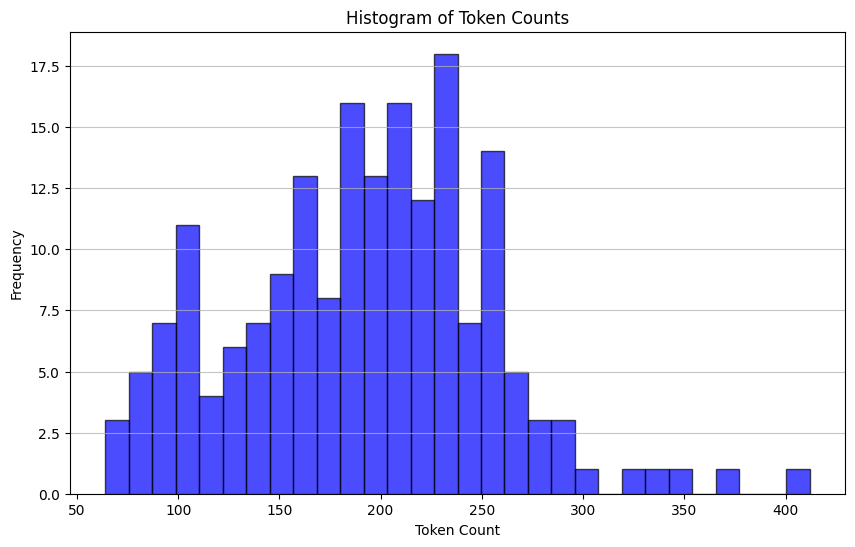

In [ ]:
# Initialize the tokenizer
tokenizer = tiktoken.get_encoding("cl100k_base")

# Function to count the number of tokens in a string
def num_tokens_from_string(string: str, encoding_name: str) -> int:
  encoding = tiktoken.get_encoding(encoding_name)
  num_tokens = len(encoding.encode(string))
  return num_tokens

cnt = [num_tokens_from_string(d, "cl100k_base") for d in doc_text]

# Plotting the histogram of token counts
plt.figure(figsize=(10, 6))
plt.hist(cnt, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# Display the histogram
plt.show()

In [ ]:
# # Doc texts concatenated all articles
# d_sorted = sorted(raw_documents, key=lambda x: x.metadata["source"])
# d_reversed = list(reversed(d_sorted))
# concatenated_content1 = "\n\n\n --- \n\n\n".join(
#     [doc.page_content for doc in d_reversed]
# )
# print(
#     "Num tokens in all context: %s"
#     % num_tokens_from_string(concatenated_content1, "cl100k_base")
# )

# from langchain_text_splitters import RecursiveCharacterTextSplitter

# chunk_size_tok = 2000
# text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
#     chunk_size=chunk_size_tok, chunk_overlap=0
# )
# texts_split = text_splitter.split_text(concatenated_content1)

In [ ]:
embd = OpenAIEmbeddings()
model = ChatOpenAI(temperature=0, model="gpt-3.5-turbo", max_tokens=4096)
# model = ChatAnthropic(temperature=0, model="claude-3-opus-20240229")

In [ ]:
leaf_texts = doc_text

In [ ]:
# Build document tree
results = recursive_embed_cluster_summarize(leaf_texts, level=1, n_levels=3)

In [ ]:
# prompt: unpickle results.pkl into results
with open("results.pkl", "rb") as f:
    results = pickle.load(f)

In [ ]:
# Choose a filename for the pickle file
pickle_file = "results.pkl"

# Open the pickle file for writing in binary mode
with open(pickle_file, "wb") as f:
    # Use pickle.dump to serialize the results dictionary into the file
    pickle.dump(results, f)

In [ ]:
results.keys()

dict_keys([1, 2, 3])

In [ ]:
results[3][1]

,summaries,level,cluster
0,The documentation provided offers a detailed s...,3,0


In [ ]:
# Initialize all_texts with leaf_texts
all_texts = leaf_texts.copy()

# Iterate through the results to extract summaries from each level and add them to all_texts
for level in sorted(results.keys()):
    # Extract summaries from the current level's DataFrame
    summaries = results[level][1]["summaries"].tolist()
    # Extend all_texts with the summaries from the current level
    all_texts.extend(summaries)

# Now, use all_texts to build the vectorstore with Chroma
vectorstore = Chroma.from_texts(texts=all_texts, embedding=embd)
retriever = vectorstore.as_retriever()

In [ ]:
# Prompt
prompt = hub.pull("rlm/rag-prompt")


# Post-processing (joining all docs retrieved after vector search)
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


# Chain
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)


In [ ]:
# Question
query = "Tell me about the topics discussed at Inventures"
ans = rag_chain.invoke(query)
ans

'The topics discussed at Inventures include technology, innovation, entrepreneurship, policy, healthcare, agri-food, sustainability, AI, quantum computing, IoT, e-sports, animal welfare, and more. Expert speakers share insights and advancements in their respective fields, emphasizing collaboration, sustainability, innovation, and social impact in shaping the future of different sectors and regions. Sessions cover a wide range of themes and provide valuable knowledge and strategies for navigating the entrepreneurial landscape effectively.'

In [ ]:
# Question
query = "Was any metric introduced for sustainability measurement?"
ans = rag_chain.invoke(query)
ans

'Yes, new environmental standards have been introduced across Canadian and global food systems to guide continuous improvements in emissions management, water use, land stewardship, waste management, and energy efficiency. These standards are driving producers, processors, retailers, and exporters to adopt new levels of data management and measurements to advance sustainable food systems. Organizations across food value chains are benefiting from taking unified approaches to measurement and utilizing technologies and tools to achieve success in sustainability.'

In [ ]:
# Using retriever with query question to fetch relevant docs
docs = retriever.invoke(query)
docs


[Document(page_content='A session under the category of : Live Long, Live Well: Unveiling Health Data which is titled as: Measuring for Success: How Data, Measurement & Technology are Advancing Sustainable Food Systems is held at Inventures. The description of this session is: New environmental standards across Canadian and global food systems are helping to guide continuous improvements in emissions management, water use, land stewardship, waste management and energy efficiency. Throughout food value chains, this is driving producers, processors, retailers and exporters to rise to a new level of data management and measurements. Join this session to learn how organizations across value chains stand to benefit from taking unified approaches to measurement, and the technologies and tools that will help them be successful.. \n The speakers of this session are: \n  - Name: David McInnes who has a position: Executive Director & Founder at Centre for Agri-Food Benchmarking\n  - Name: Julie 

In [ ]:
# Question
query = "How many sessions did we have?"
ans = rag_chain.invoke(query)
ans

In [ ]:
# Question
query = "How many sessions had a speaker named Laura Kilcrease?"
ans = rag_chain.invoke(query)
ans

In [ ]:
# Question
query = "Who are the people working at the same company as Laura Kilcrease does??"
ans = rag_chain.invoke(query)
ans

# 8) Conclusion

<pr> Let's review our work through a lense that I learnt recently from, which is <strong> Problem-Solution-Benefits </strong> </pr>
<br>

<h2>Problem; Beat it or join it! </h2>

<br>
<h2>Solution; We implemented RAG yet can go further! </h2>

<br>
<h2>Benefits; Data retrieval and analysis never go out of style!</h2>

